# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

_Additional Reference_: MCMC Tutorial - https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html

### Student Information

_Full Name (Last Name, First Name)_: Franco, Andrea Rose\
_Student No._: 2021-06793\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ANDREA ROSE V. FRANCO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

# **Loading dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/andrearosefranco/School/AP157/MCMC Files/"

LIGO = pd.read_csv(file_path + 'LIGO.csv')
LISA = pd.read_csv(file_path + 'LISA.csv')
ET = pd.read_csv(file_path + 'ET.csv')

#LIGO
zLIGO = LIGO.loc[:, 'zLIGO']
dlLIGO = LIGO.loc[:, 'dlLIGO']
errLIGO = LIGO.loc[:, 'errLIGO']

#LISA
zLISA = LISA.loc[:, 'zLISA']
dlLISA = LISA.loc[:, 'dlLISA']
errLISA = LISA.loc[:, 'errLISA']

#ET
zET = ET.loc[:, 'zET']
dlET = ET.loc[:, 'dlET']
errET = ET.loc[:, 'errET']

By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

# **Hubble Diagram**

A Hubble diagram shows the relationship between distance and redshift. Their linear relation is expressed as:

$cz = H_0 d$

where c is the speed of light, z is the spectroscopic redshift, d is the distance, and $H_0$ is the Hubble constant.

Source: https://skyserver.sdss.org/dr12/en/proj/advanced/hubble/conclusion.aspx

Using the data from LIGO, LISA, and ET observatories, we plot their observations:

Text(0.5, 1.0, 'Hubble Diagram')

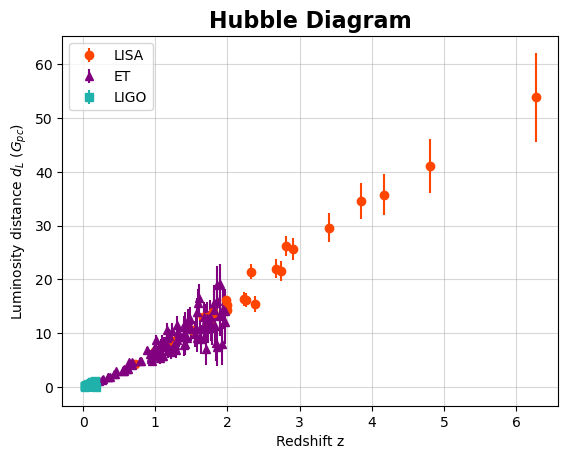

In [3]:
plt.errorbar(zLISA, dlLISA, yerr = errLISA, fmt='o', color = 'orangered', label = 'LISA')
plt.errorbar(zET, dlET, yerr = errET, fmt='^', color = 'purple', label = 'ET')
plt.errorbar(zLIGO, dlLIGO, yerr = errLIGO, fmt='s', color = 'lightseagreen', label = 'LIGO')
plt.xlabel('Redshift z')
plt.ylabel(r'Luminosity distance $d_L$ ($G_{pc})$')
plt.grid(alpha=0.5)
plt.legend()
plt.title('Hubble Diagram', fontweight='bold', fontsize='16')

We can see from the results above that the redshift increases linearly with the luminosity distance. From the linear relation introduced above, we know that the slope of their linear fit gives the Hubble constant. 

Analyzing their differences, we can see that LISA can observe higher redshifts than the other two. On the other hand, we can observe that LIGO observations are concentrated at lower redshifts and luminosity distance. In general, we can see that there are more samples at closer distance as seen by the concentrated number of data points from $d_L = 0$ to $d_L = 15$.

There are also relatively greater error bars in ET observations. This is related to its higher sensitivity, which allow detection of fainter signals and thus, may allow greater uncertainties. 

To further see their differences, we can plot them individually along with their redshift distribution.

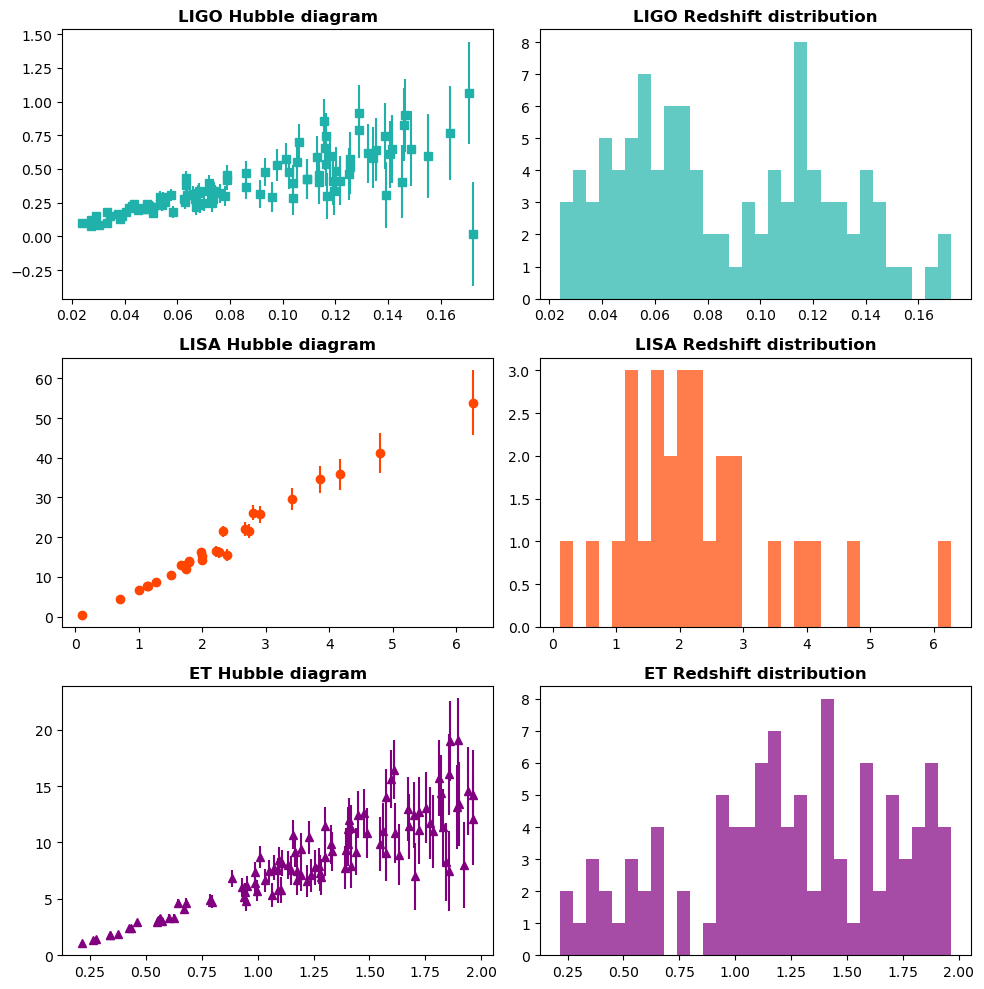

In [4]:
fig, axs = plt.subplots(3, 2, figsize = (10, 10))

#Plot zLIGO
axs[0, 0].errorbar(zLIGO, dlLIGO, yerr = errLIGO, fmt='s', color='lightseagreen')
axs[0, 0].set_title('LIGO Hubble diagram', fontweight='bold')
axs[0, 1].hist(zLIGO, bins=30, color='lightseagreen', alpha=0.7)
axs[0, 1].set_title('LIGO Redshift distribution', fontweight='bold')

#Plot zLISA
axs[1, 0].errorbar(zLISA, dlLISA, yerr = errLISA, fmt='o', color='orangered')
axs[1, 0].set_title('LISA Hubble diagram', fontweight='bold')
axs[1, 1].hist(zLISA, bins=30, color='orangered', alpha=0.7)
axs[1, 1].set_title('LISA Redshift distribution', fontweight='bold')

#Plot zET
axs[2, 0].errorbar(zET, dlET, yerr = errET,fmt='^', color='purple')
axs[2, 0].set_title('ET Hubble diagram', fontweight='bold')
axs[2, 1].hist(zET, bins=30, color='purple', alpha=0.7)
axs[2, 1].set_title('ET Redshift distribution', fontweight='bold')

plt.tight_layout()
plt.show()

*(Note that the xlim and ylim are different for all. I did not set them to be the same so we can see the zoomed in version.)*

In comparing them we can see that LISA's Hubble diagram is more spread out and measure high redshift values up to z=6. Meanwhile, LIGO's observations are all less than z=1. These observations may be related to their distance range characteristics in a way that LISA has a higher distance observation range than LIGO and ET. This does not mean tho that LISA is better! This just means that they observe different physical events. For example, LISA's targets will be catered to supermassive black hole while LIGO's targets are neutron star mergeres and pulsars.

Analyzing their histograms also indicated the unimodal distribution of LISA's redshift in comparison to the multimodal distribution in both LIGO and ET.

#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




## **Likelihood functions**

Recall the Bayes formula:

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

where 
* $P(A|B)$ - posterior probability
* $P(B|A)$ - likelihood
* $P(A)$ - prior probability
* $P(B)$ - marginal likelihood

In this formula, the likelihood represents how we think our data is distributed. 

In [5]:
from astropy.cosmology import FlatLambdaCDM

Our cosmological model is the FlatLambdaLCM which is used to define the relationship of luminosity distance to parameters $H_0$ and $\Omega$m0. The plot below shows the model using different values of $H_0$ and $\Omega$m0. The three models defined represent different universe. The `cosmo` being a normal, `cosmoMat` being matter-dominated, and `cosmoDE` being dominated by dark energy.

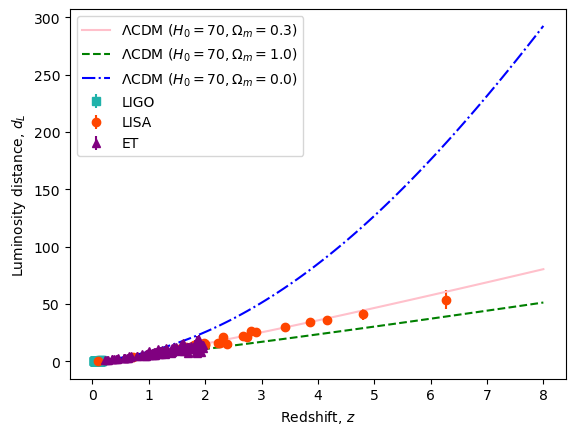

In [23]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
cosmoMat = FlatLambdaCDM(H0=70, Om0=1.0, Tcmb0=2.725) #Greater Om0 means dominated by Matter
cosmoDE = FlatLambdaCDM(H0=70, Om0=0.0, Tcmb0=2.725) #Greatter H0 means mainly dark energy

#Get the luminosity distance for the different models
zspace = np.linspace(0, 8, 100)
dLmodel = cosmo.luminosity_distance(zspace)/1000
dLmodelMat = cosmoMat.luminosity_distance(zspace)/1000
dLmodelDE = cosmoDE.luminosity_distance(zspace)/1000

fig, ax = plt.subplots()
ax.errorbar(zLIGO, dlLIGO, yerr = errLIGO, fmt = 's', label = 'LIGO', color='lightseagreen')
ax.errorbar(zLISA, dlLISA, yerr = errLISA, fmt = 'o', label = 'LISA', color='orangered')
ax.errorbar(zET, dlET, yerr = errET, fmt = '^', label = 'ET', color='purple')

ax.plot(zspace, dLmodel, '-', label = r'$\Lambda$CDM ($H_0 = 70, \Omega_m = 0.3$)', color='pink')
ax.plot(zspace, dLmodelMat, '--', label = r'$\Lambda$CDM ($H_0 = 70, \Omega_m = 1.0$)', color='green')
ax.plot(zspace, dLmodelDE, '-.', label = r'$\Lambda$CDM ($H_0 = 70, \Omega_m = 0.0$)', color='blue')

ax.set_xlabel(r'Redshift, $z$')
ax.set_ylabel(r'Luminosity distance, $d_L$')
ax.legend(loc = 'upper left')
plt.show()

From the plot above, we can see that the points can fit differently depending on the value of the parameters. For a normal universe, the model fits a straight line. For a dark energy dominated universe, the best-fit is a curve. Because of this, we can use statistical fitting methods such as MCMC (which we will tackle later on!) to determine the best value parameters and best-fit model on our given data points.

Below, we define functions for calculating the $\chi^2$.  Given these parameters, the luminosity distance is calculated using the redshift values. The deviation between model predictions and the observed luminosity distance is calculated. It is then normalized by dividing the errors/uncertainties in the data. The same process is applied for the LISA and ET data. 

We also define functions for calculating the log liklihood of LIGO alone, LIGO + LISA, and LIGO + LISA + ET. These log likelihood functions takes a vector in the parameter space and returns negative infinity if the prior is not within range and returns the maximum likelihood function if within range.

In [6]:
#LIGO
def chi2LIGO_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      #Define cosmological model
    model = np.array(cosmo.luminosity_distance(zLIGO)/1000) #Converted from Gpc to Mpc units
    dev = (model - np.array(dlLIGO))/np.array(errLIGO)      #Deviations between model and data
    chi2 = sum(dev**2)
    return chi2

def llikeLIGO_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf                        #Return inf if outside priors
    else:
        return -0.5*chi2LIGO_lcdm(theta)

#LIGO + LISA
def chi2LISA_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLISA)/1000)
    dev = (model - np.array(dlLISA))/np.array(errLISA)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISA_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(theta) + chi2LISA_lcdm(theta))

#LIGO + LISA + ET
def chi2ET_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      #Define cosmological model
    model = np.array(cosmo.luminosity_distance(zET)/1000) #Converted from Gpc to Mpc units
    dev = (model - np.array(dlET))/np.array(errET)      #Deviations between model and data
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISAET_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(theta) + chi2LISA_lcdm(theta) + chi2ET_lcdm(theta))

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can try the ff. parameters-- number of walkers (nwalkers) of 100 and number of iterations (niter) of 1,000 and number of burn-in samples (nburn) of 100.

Note that the number of dimensions (ndim) is the number of parameters, equal to 2.

For the methodology of stepping from one place of the grid to another, you can use:

    dres = [0.1, 0.003] # step size for H_0 and omega_m,0, respectively
    initial = np.array([70., 0.3])
    p0 = [initial + dres * np.random.randn(ndim) for i in range(nwalkers)]

For the 'lnprob' function equivalent, you can define (for example):

    def lnprob(x):
      '''params: H0, Om0 = x0, x1'''
      return llikeLIGOLISA_lcdm(x[0], x[1])

Also note that because in our definition of likelihood functions, the data is ``hard-coded'', you do not need to use the "args" keyword in the emcee.EnsembleSampler command.

# **Monte Carlo Markov Chain (MCMC)**

The main idea of MCMC is to build a Markov chain that draws samples from a probability distribution. From an initial value, each MCMC walker takes steps to new parameter values and generates a model using those parameter. This model is then compared to the given data.

In short, **MCMC** is a method for **fitting models to data**. Note that the MCMC is inherently Bayesian. From the discussion above, we impose priors as the parameters. 

Every walker records the parameter and the likelihood of the model at that parameter value.

In [7]:
import emcee
import numpy as np
from astropy.cosmology import FlatLambdaCDM

In [8]:
#Initialize MCMC
nwalkers = 100 #Walkers in the ensemble
niter = 1000 #Iteration/steps
nburn = 100 #Burn-in values
initial = np.array([70., 0.3]) #Choose an initial guess in parameter space
ndim = len(initial) #Dimensions in parameter space
dres = [0.1, 0.003] #Step size for H_0 and omega_m,0, respectively

#Methodology of stepping from one place to the next
p0 = [initial + dres * np.random.randn(ndim) for i in range(nwalkers)]

We define a function to run the MCMC. Using the initial position, number of walker, iterations, dimensions, and the likelihod function, we run the `EnsembleSampler` from `emcee` which is using multiple walkers.

We first have a burn-in phase of the sampler. This just means letting the system settle into the new state. Afterwards, we reun `sampler.reset()` to discard this initial chain and start where the sampler left off. After running, we return four arguments: sampler, final position, final probability, and state of the sampler.

In [9]:
#Function to run the MCMC
def main(p0,nwalkers,niter,ndim,lnprob):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
    
    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset() #Discard the current chain

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)
    
    return sampler, pos, prob, state

### **Running the MCMC for LIGO, LIGO + LISA, and LIGO + LISA + ET**

In [10]:
#LIGO
sampler_LIGO, pos1, prob1, state1 = main(p0,nwalkers,niter,ndim,llikeLIGO_lcdm)

Running burn-in...
Running production...


In [11]:
#LIGO + LISA
sampler_LIGOLISA, pos2, prob2, state2 = main(p0,nwalkers,niter,ndim,llikeLIGOLISA_lcdm)

Running burn-in...
Running production...


In [12]:
#LIGO + LISA + ET
sampler_LIGOLISAET, pos3, prob3, state3 = main(p0,nwalkers,niter,ndim,llikeLIGOLISAET_lcdm)

Running burn-in...
Running production...


The flatchain attribute concatenates all walker's chains into one. 

In [13]:
samples_LIGO = sampler_LIGO.flatchain
samples_LIGOLISA = sampler_LIGOLISA.flatchain
samples_LIGOLISAET = sampler_LIGOLISAET.flatchain

#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.

### **Visualizing constraints using corner plot**

In [14]:
import corner

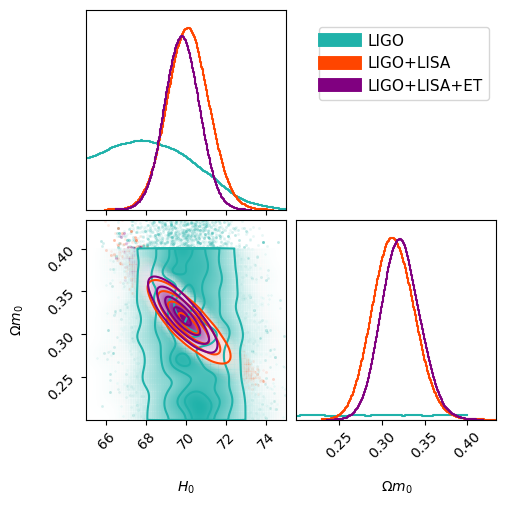

In [15]:
labels = [F'$H_0$',f'$\Omega$$m_0$']
colors = ['lightseagreen', 'orangered', 'purple']
sample_labels = ["LIGO", "LIGO+LISA", "LIGO+LISA+ET"]
fig = corner.corner(samples_LIGO, bins = np.sqrt(np.shape(samples_LIGO)[0]),labels=labels, color=colors[0],smooth = 15, smooth1d = 10, range = [(65,75),(0.2,0.4)] )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
corner.corner(samples_LIGOLISA, bins = np.sqrt(np.shape(samples_LIGOLISA)[0]),labels=labels, fig = fig, color=colors[1],smooth = 10, smooth1d = 10, ls = '--' )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
corner.corner(samples_LIGOLISAET, bins = np.sqrt(np.shape(samples_LIGOLISAET)[0]),labels=labels, fig = fig, color=colors[2],smooth = 10, smooth1d = 10, ls = '--' )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84], color='green')


plt.legend([plt.Line2D([0], [0], color=colors[i], lw=10) for i in range(3)], 
           sample_labels, fontsize=11, frameon=True, bbox_to_anchor=(1, 2), loc="upper right")


In a corner plot, the diagonal shows the distribution. We can see that when we increase our data points, i.e. combining the observations of the three LIGO + LISA and LIGO + LISA + ET, we approach a normalliy distributed data for both the guesses of $\Omega$$m_0$ and $H_0$

The off-diagonal plots are the correlation of the guesses.  Elliptical contours typically suggest a strong correlation and well-defined joint constraints. We can see that with LIGO observations alone, the guesses are more spread out and does not resemble that of an ellipse. This is because for LIGO alone, we only have small amount of data. If we increase our data, we narrow down the estimates, leading to a more strongly correlated $\Omega$$m_0$ and $H_0$.